In [5]:

print("Start")

import gensim 
from gensim.models import KeyedVectors
w2v_model = KeyedVectors.load_word2vec_format("/home/phu/TextSummary/viet_vec/vi.vec")


vocabulary = []
for word in  w2v_model.index_to_key :
    vocabulary.append(word)
print(len(vocabulary))

Start
10088


In [6]:
content = """
iPhone Pro 11 Max đang chạy hệ điều hành iOS 13 mới nhất của Apple. Về hiệu năng, iPhone 11 Pro Max là iPhone mạnh nhất hiện nay. Điểm Geekbench của iPhone 11 Pro Max là 3420, con số này thể hiện rằng 11 Pro Max mạnh hơn khoảng 10% so với iPhone 11 và hơn 20% so với iPhone XS Max.
Nhưng đây chỉ là những con số, còn hiệu năng thực tế của iPhone 11 Pro Max khi sử dụng hàng ngày thì sao? Thật khó để có thể khiến iPhone chậm đi, bởi vì máy có tốc độ khởi động ứng dụng rất nhanh và bạn có thể sử dụng chúng ngay lập tức.
Tuy nhiên, camera là ứng dụng duy nhất iPhone thể hiện sự chậm chạp, phải mất một giây để tải ứng dụng (đôi khi nó có thể bị đứng). Khi bạn chụp ảnh bằng ống kính siêu rộng xem, hình ảnh cũng không xuất hiện ngay lập tức khi nhấn nút chụp.
Tải ảnh để chỉnh sửa cũng mất một hoặc hai giây, cũng như một số thao tác lưu hình ảnh. Chúng tôi đánh giá cao việc iPhone có thể chịu được một lượng lớn hình ảnh được xử lý. Tuy nhiên, chúng tôi mong đợi mọi thứ sẽ nhanh hơn một chút, thay vì phải để xem một bánh xe quay quay trong quá trình xử lý. Thêm nữa, khi xem một bộ phim được tải về và tua đến một cảnh tùy ý thì iPhone lại bị đứng.
Mỗi năm một lần, hội rước đèn đêm Trung thu ở xã em diễn ra tại sân vận động của xã rất từng bừng, náo nhiệt.
Tối mười bốn tháng tám âm lịch, trên bãi sân rộng, thiếu nhi trong xã xếp hàng từng đội theo xóm. Tay bạn nào cũng cầm theo một cái lồng đèn được mua hoặc tự làm hay ống tre làm thành đuốc. Ban tổ chức gọi tổ trưởng lên bàn nhận bánh kẹo về cho tổ mình. Sau khi tổ trưởng phát xong kẹo bánh, có vài tiết mục văn nghệ “Cây nhà lá vườn” diễn ra ở sân rộng, thiếu niên nhi đồng vỗ tay theo nhịp, ủng hộ những nghệ sĩ không chuyên nghiệp của xã nhà. Tiếp đó là lệnh đốt nến. Tất cả các lồng đèn, đuốc được thắp sáng. Lúc bấy giờ sân bãi đẹp lung linh, kì ảo với hàng trăm ánh nến xanh, vàng, đỏ và ánh hồng của cây đuốc làm bằng ống tre. Lễ rước đèn Trung thu bắt đầu bằng bài hát “Rước đèn Trung thu”. Thiếu nhi vừa cầm lồng đèn, vừa hát “Tết Trung thu...”. Đoàn rước đèn đi một vòng quanh xã. Các cô chú Đội sản xuất và các anh chị Thanh niên xã đoàn đi kèm thiếu nhi đều giữ hàng ngũ ngay ngắn, trật tự, vừa tạo mĩ quan của hội rước đèn, vừa coi sóc phòng cháy (do đốt đèn nến và đuốc nên phải tăng cường phòng vệ, trông coi). Dọc đường, có bạn cầm lồng đèn từ trong nhà chạy ra nhập vào đoàn thiếu nhi đang “rồng rắn” rước đèn. Trên đường về, bạn nàonhà gần đường đi rước đèn có thể tách hàng về nhà. Trăng lúc này đã lên cao, tròn vành vạnh soi ánh vàng trong trẻo xuống mặt đất. Đoàn thiếu nhi vừa đi, vừa hát trở lại chỗ xuất phát. Các anh chị xã đoàn bắt nhịp bài hát "Như có Bác trong ngày đại thắng”. Kết thúc ngày hội, chúng em chia tay nhau và ra về.
Buổi lễ rước đèn là sinh hoạt rất vui của thiếu nhi xã em và đã trở thành thông lệ không thể thiếu trong ngày lễ Trung Thu. Em rất yêu quê và yêu ngày hội Trung thu ở quê hương mình.
"""

In [7]:

contents_parsed = content.lower() 
contents_parsed = contents_parsed.replace('\n', ' ')
contents_parsed = contents_parsed.strip() 

In [8]:
import nltk
sentences = nltk.sent_tokenize(contents_parsed)

In [9]:
keys = []
for i in range(len(sentences)):
    keys.append(str(i))
print(keys)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30']


In [11]:
from pyvi import ViTokenizer
import numpy as np

embedding_clusters = []
sent_clusters = []
i = 0
for sentence in sentences:
    embeddings = []
    sent = []
        
    sentence = gensim.utils.simple_preprocess(sentence)
    sentence = ' '.join(sentence)
    sentence_tokenized = ViTokenizer.tokenize(sentence)
    
    words = sentence_tokenized.split(" ")
    sentence_vec = np.zeros((100))
    for word in words:
        if word in vocabulary:
            sentence_vec+=w2v_model[word]
    embeddings.append(sentence_vec)
            
    sent.append(str(i))
    
    embedding_clusters.append(embeddings)
    sent_clusters.append(sent)
    
    i+=1

In [12]:
print(sent_clusters)


[['0'], ['1'], ['2'], ['3'], ['4'], ['5'], ['6'], ['7'], ['8'], ['9'], ['10'], ['11'], ['12'], ['13'], ['14'], ['15'], ['16'], ['17'], ['18'], ['19'], ['20'], ['21'], ['22'], ['23'], ['24'], ['25'], ['26'], ['27'], ['28'], ['29'], ['30']]


(31, 1, 100)


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/tmp/ipykernel_64836/1742043203.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc=4)


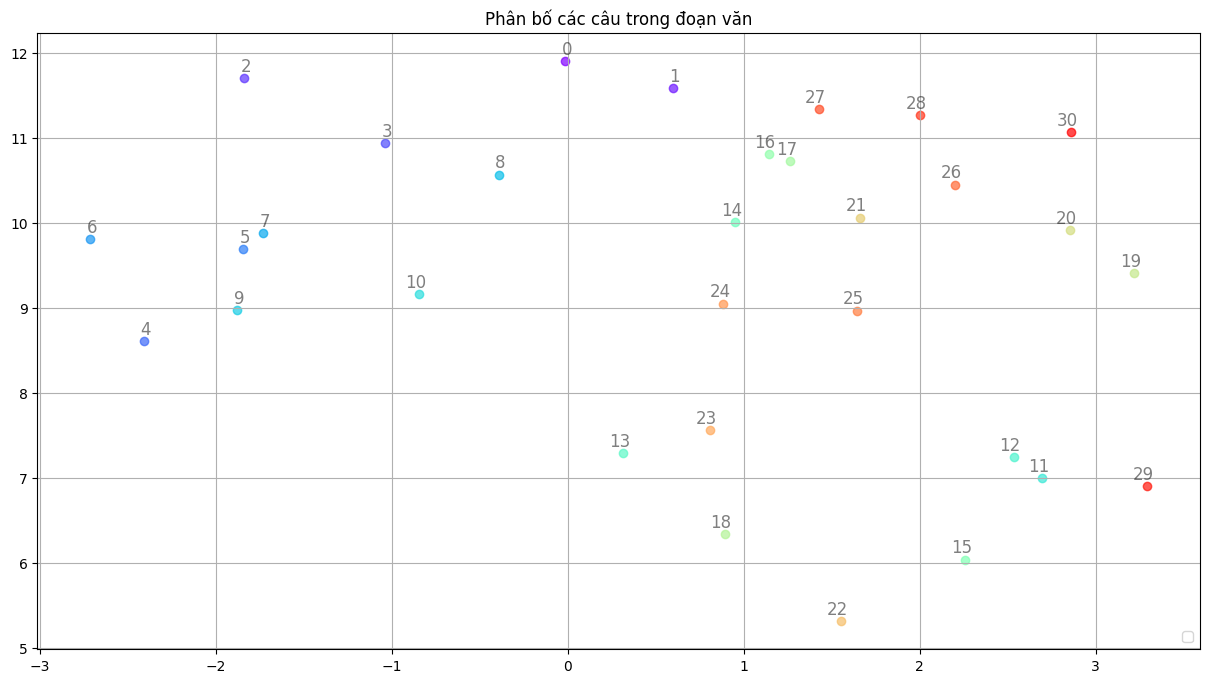

In [13]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
print(embedding_clusters.shape)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)


import matplotlib.pyplot as plt
import matplotlib.cm as cm
# % matplotlib inline


def tsne_plot_similar_words(title, labels, embedding_clusters, sent_clusters, a, filename=None):
    plt.figure(figsize=(15, 8))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, sent_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=np.array([color,]), alpha=a)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=12)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Phân bố các câu trong đoạn văn', keys, embeddings_en_2d, sent_clusters, 0.7,
                        'output.png')

In [15]:
X = []
for sentence in sentences:
    
    sentence = gensim.utils.simple_preprocess(sentence)
    sentence = ' '.join(sentence)
    sentence_tokenized = ViTokenizer.tokenize(sentence)
    print(sentence_tokenized)
    words = sentence_tokenized.split(" ")
    sentence_vec = np.zeros((100))
    for word in words:
        if word in vocabulary:
            sentence_vec+=w2v_model[word]
    X.append(sentence_vec)

iphone pro max đang chạy hệ điều_hành ios mới nhất của apple
về hiệu_năng iphone pro max là iphone mạnh nhất hiện_nay
điểm geekbench của iphone pro max là con_số này thể_hiện rằng pro max mạnh hơn khoảng so với iphone và hơn so với iphone xs max
nhưng đây chỉ là những con_số còn hiệu_năng thực_tế của iphone pro max khi sử_dụng hàng ngày thì sao
thật khó để có_thể khiến iphone chậm đi bởi_vì máy có tốc_độ khởi_động ứng_dụng rất nhanh và bạn có_thể sử_dụng chúng ngay lập_tức
tuy_nhiên camera là ứng_dụng duy_nhất iphone thể_hiện sự chậm_chạp phải mất một giây để tải ứng_dụng đôi_khi nó có_thể bị đứng
khi bạn chụp ảnh bằng ống_kính siêu rộng xem hình_ảnh cũng không xuất_hiện ngay lập_tức khi nhấn nút chụp
tải ảnh để chỉnh_sửa cũng mất một hoặc hai giây cũng như một số thao_tác lưu hình_ảnh
chúng_tôi đánh_giá cao việc iphone có_thể chịu được một lượng lớn hình_ảnh được xử_lý
tuy_nhiên chúng_tôi mong_đợi mọi thứ sẽ nhanh hơn một_chút thay_vì phải để xem một bánh_xe quay quay trong quá_trình 

In [16]:
from sklearn.cluster import KMeans

n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters)
kmeans = kmeans.fit(X)

In [17]:
from sklearn.metrics import pairwise_distances_argmin_min

avg = []
for j in range(n_clusters):
    idx = np.where(kmeans.labels_ == j)[0]
    avg.append(np.mean(idx))
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
ordering = sorted(range(n_clusters), key=lambda k: avg[k])
summary = ' '.join([sentences[closest[idx]] for idx in ordering])

In [18]:
print(summary)


tuy nhiên, camera là ứng dụng duy nhất iphone thể hiện sự chậm chạp, phải mất một giây để tải ứng dụng (đôi khi nó có thể bị đứng). mỗi năm một lần, hội rước đèn đêm trung thu ở xã em diễn ra tại sân vận động của xã rất từng bừng, náo nhiệt. các anh chị xã đoàn bắt nhịp bài hát "như có bác trong ngày đại thắng”. lúc bấy giờ sân bãi đẹp lung linh, kì ảo với hàng trăm ánh nến xanh, vàng, đỏ và ánh hồng của cây đuốc làm bằng ống tre. buổi lễ rước đèn là sinh hoạt rất vui của thiếu nhi xã em và đã trở thành thông lệ không thể thiếu trong ngày lễ trung thu.


In [19]:
from sklearn.cluster import AgglomerativeClustering

n_clusters_kmean = 5

## ======== hierarchical clustering =========
n_clusters_hierarchy = 5  # number of regions
ward = AgglomerativeClustering(n_clusters=n_clusters_hierarchy)
ward = ward.fit(X)
print(ward.labels_)

# ======== Determining the closest point to the center of each cluster
X_Clusters = []
idx_cluster = [] 
for j in range(n_clusters_kmean):
    idx = np.where(ward.labels_ == j)[0]  # List of element in each cluster
    cluster_elements = []
    for k in range(len(idx)):
        cluster_elements.append(X[idx[k]])
    idx_cluster.append(idx)
    X_Clusters.append(cluster_elements)

hierarchical_summary = []
avg1 = []
for j in range(len(X_Clusters)):
    kmeans1 = KMeans(n_clusters = 1)
    kmeans1 = kmeans1.fit(X_Clusters[j])

    idx1 = np.where(kmeans1.labels_ == 0)[0]
    avg1.append(np.mean(idx1))

    closest1, _ = pairwise_distances_argmin_min(kmeans1.cluster_centers_, X_Clusters[j])
    hierarchical_summary.append(' ' + (sentences[idx_cluster[j][closest1[0]]]))

ordering1 = sorted(range(n_clusters_hierarchy), key=lambda k: avg1[k])
sumary2 = ' '.join([sentences[closest[idx]] for idx in ordering])

print("\n*** Using Hierarchical clustering and finding the center cluster by Kmean:\n")
print(sumary2)

[2 2 0 0 0 0 0 0 0 0 0 4 4 1 2 4 2 2 1 2 2 2 3 1 2 2 2 2 2 4 2]

*** Using Hierarchical clustering and finding the center cluster by Kmean:

tuy nhiên, camera là ứng dụng duy nhất iphone thể hiện sự chậm chạp, phải mất một giây để tải ứng dụng (đôi khi nó có thể bị đứng). mỗi năm một lần, hội rước đèn đêm trung thu ở xã em diễn ra tại sân vận động của xã rất từng bừng, náo nhiệt. các anh chị xã đoàn bắt nhịp bài hát "như có bác trong ngày đại thắng”. lúc bấy giờ sân bãi đẹp lung linh, kì ảo với hàng trăm ánh nến xanh, vàng, đỏ và ánh hồng của cây đuốc làm bằng ống tre. buổi lễ rước đèn là sinh hoạt rất vui của thiếu nhi xã em và đã trở thành thông lệ không thể thiếu trong ngày lễ trung thu.
